# Import libs

In [1]:
import pandas as pd
import numpy as np
from naive_bayes_classifier.naive_bayes_classifier import naive_bayes_classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Loading Iris dataset

In [2]:
Xy = pd.read_csv('./datasets/iris.csv')
X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Running the tests and computing informations

In [3]:
realizations = 20
hit_rate_list = []
std_dev = 0
confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    nbc_model = naive_bayes_classifier()
    nbc_model.fit(X_train, y_train)

    hit_rate_list.append(nbc_model.score(X_test, y_test))

    y_pred = [nbc_model.predict(x) for x in X_test.values]

    confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

std_dev = np.std(hit_rate_list)

# Showing informations computed

In [4]:
print('Hit rate:')
print(hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(hit_rate_list)/len(hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in confusion_matrix_list:
    print(matrix, end='\n')

Hit rate:
[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9666666666666667, 1.0, 0.8666666666666667, 0.9333333333333333, 0.9333333333333333, 1.0, 0.9666666666666667]

Accuracy:
0.9533333333333334

Standard Deviation:
0.032317865716108854

Confusion Matrix:
[[ 7  0  0]
 [ 0  8  1]
 [ 0  0 14]]
[[12  0  0]
 [ 0 12  0]
 [ 0  1  5]]
[[ 5  0  0]
 [ 0 10  1]
 [ 0  0 14]]
[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]
[[15  0  0]
 [ 0  6  0]
 [ 0  1  8]]
[[ 9  0  0]
 [ 0  7  2]
 [ 0  1 11]]
[[12  0  0]
 [ 0  7  1]
 [ 0  0 10]]
[[11  0  0]
 [ 0 12  0]
 [ 0  1  6]]
[[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
[[ 9  0  0]
 [ 0 12  1]
 [ 0  0  8]]
[[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]
[[11  0  0]
 [ 0  7  0]
 [ 0  3  9]]
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
[[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]
[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
[[ 

# Choosing two columns from the last X_train and X_test to plot decision surface

In [5]:
X_train_2d, X_test_2d = X_train[['sepal-length', 'sepal-width']], X_test[['sepal-length', 'sepal-width']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     sepal-length  sepal-width
12            4.8          3.0
22            4.6          3.6
120           6.9          3.2
92            5.8          2.6
57            4.9          2.4
..            ...          ...
82            5.8          2.7
89            5.5          2.5
14            5.8          4.0
139           6.9          3.1
116           6.5          3.0

[120 rows x 2 columns]
Test dataset:
     sepal-length  sepal-width
62            6.0          2.2
20            5.4          3.4
37            4.9          3.1
7             5.0          3.4
51            6.4          3.2
144           6.7          3.3
48            5.3          3.7
138           6.0          3.0
145           6.7          3.0
68            6.2          2.2
140           6.7          3.1
44            5.1          3.8
46            5.1          3.8
131           7.9          3.8
4             5.0          3.6
9             4.9          3.1
119           6.0          2.2
115           6.4

# Training the model with the new dataset 2d

In [6]:
nbc_model = naive_bayes_classifier()
nbc_model.fit(X_train_2d, y_train)

# Plotting decision surface

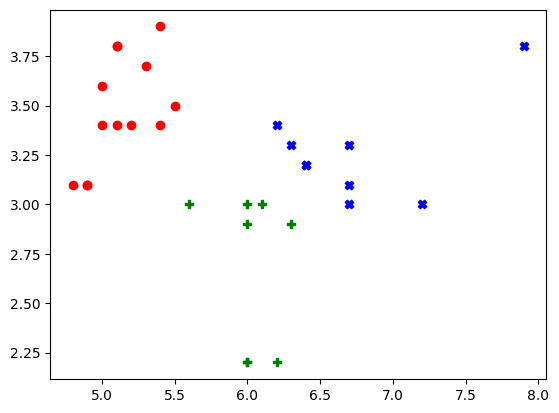

In [7]:
data = X_test_2d[:][:].values

y_pred = np.array([nbc_model.predict(x) for x in X_test_2d.values])

setosa = np.where(y_pred == 'Iris-setosa')
virginica = np.where(y_pred == 'Iris-virginica')
versicolor = np.where(y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='blue', marker='X', label='virginica')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='green', marker='P', label='versicolor')

plt.show()